In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_csv = pd.read_csv('train.csv')
train_csv.shape

(31962, 3)

In [4]:
train_csv.drop(train_csv.tail(15000).index, inplace = True)
train_csv.shape 

(16962, 3)

In [5]:
train_csv.drop(['id'],axis=1,inplace=True) #deleting "useless" columns
train_csv.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


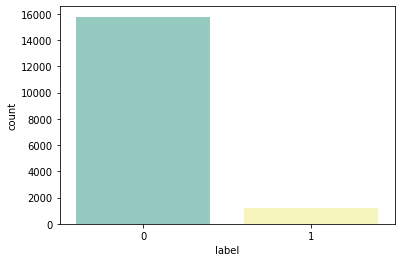

In [6]:
sns.countplot(x="label", data=train_csv, palette="Set3")

In [7]:
pos = train_csv[train_csv['label']==0]
neg = train_csv[train_csv['label']==1]

In [8]:
all_tweets = " ".join(train_csv['tweet'].tolist())

In [9]:
all_pos_tweets = " ".join(pos['tweet'].tolist())

In [10]:
all_neg_tweets = " ".join(neg['tweet'].tolist())

In [11]:
!pip install WordCloud
from wordcloud import WordCloud

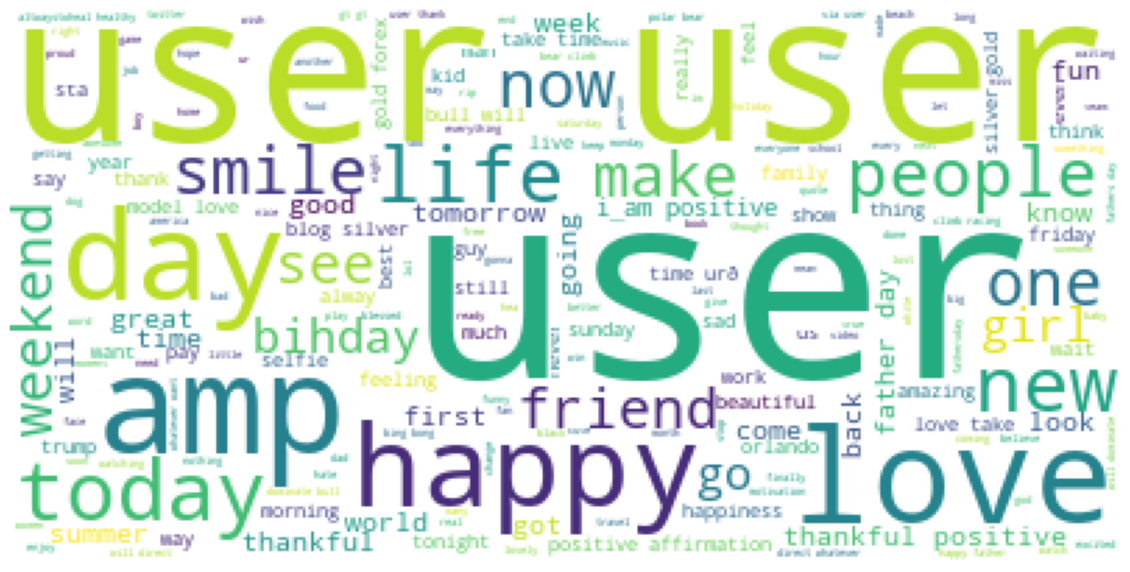

In [12]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(background_color='white').generate(all_tweets))
plt.axis("off")
plt.show()

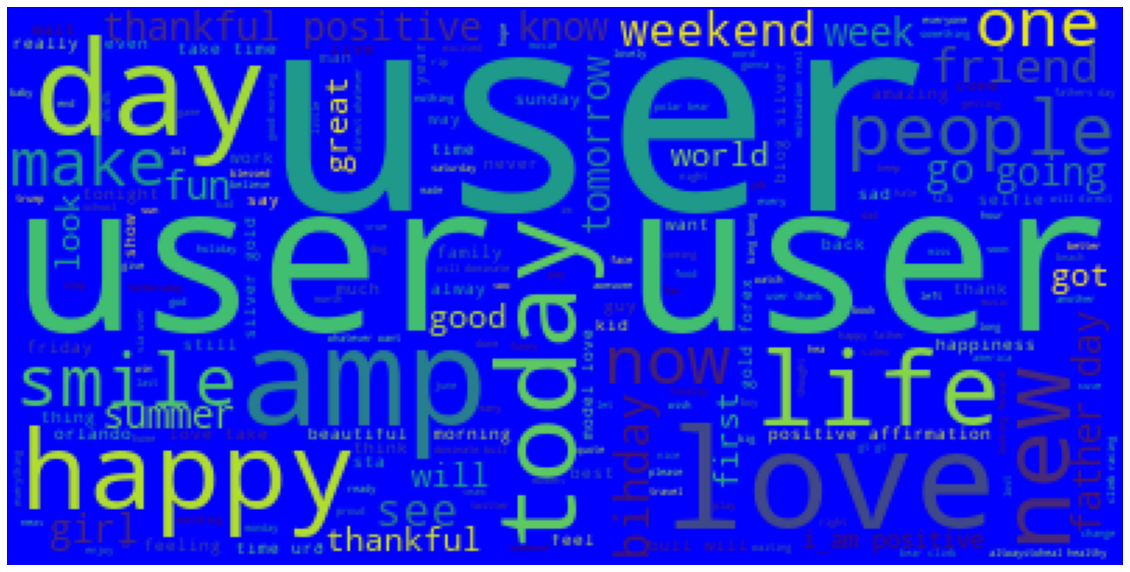

In [13]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(background_color='blue').generate(all_pos_tweets))
plt.axis("off")
plt.show()

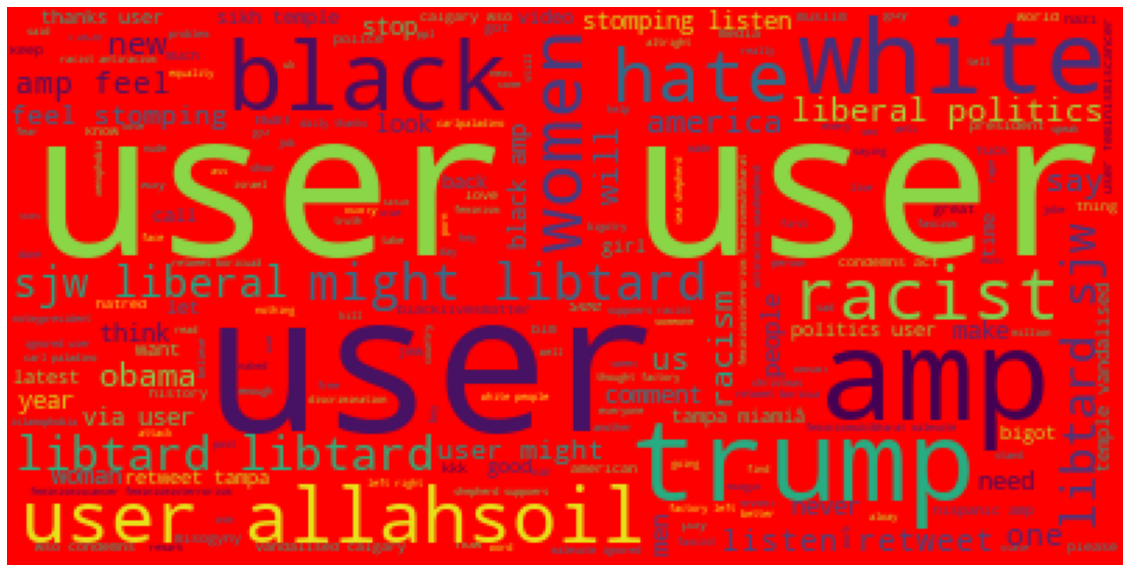

In [14]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud(background_color='red').generate(all_neg_tweets))
plt.axis("off")
plt.show()

In [11]:
import nltk
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
from nltk.corpus import stopwords

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
tweets_countvectorizer = CountVectorizer(analyzer = message_cleaning, dtype = 'uint8').fit_transform(train_csv['tweet']).toarray()
# tweets_countvectorizer = vectorizer

In [16]:
X = tweets_countvectorizer
Y = train_csv['label']

In [17]:
X.shape

(16962, 31093)

In [18]:
Y.shape

(16962,)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(tweets_countvectorizer, train_csv['label'], test_size=0.2)

In [20]:
del X

In [21]:
del Y

In [22]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

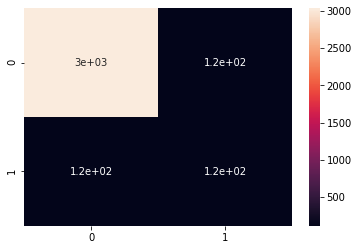

In [24]:
# Predicting the Test set results
Y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_predict_test)
sns.heatmap(cm, annot=True)

In [25]:
print(classification_report(Y_test, Y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3154
           1       0.49      0.49      0.49       239

    accuracy                           0.93      3393
   macro avg       0.73      0.72      0.73      3393
weighted avg       0.93      0.93      0.93      3393

